### Handling missing categorical data / Simple Imputer / most_frequent Imputation

## missing categorical imputation

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
pd.set_option("display.max_columns", None)

In [24]:
url = "https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day37-handling-missing-categorical-data/train.csv"
df = pd.read_csv(url, usecols=['GarageQual','FireplaceQu','SalePrice'])

In [25]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [26]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

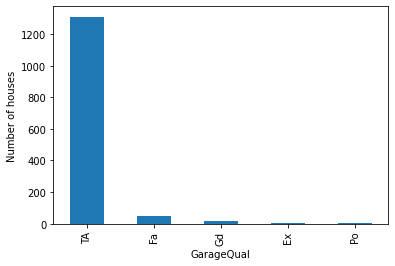

In [27]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

### With mode

In [28]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

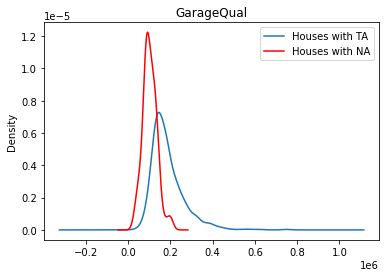

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [30]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [31]:
df['GarageQual'].fillna("TA", inplace=True)

<AxesSubplot:>

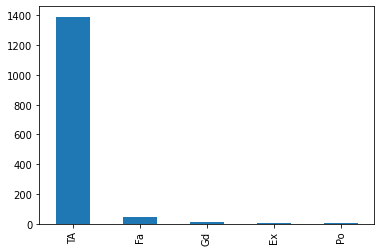

In [32]:
df['GarageQual'].value_counts().plot(kind="bar")

Text(0.5, 1.0, 'GarageQual')

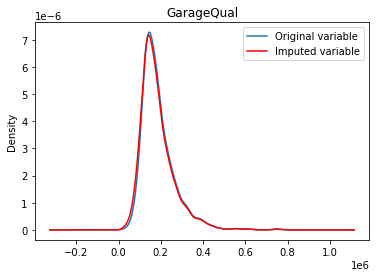

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax = ax)

# distribution of the variable after imputation
df[df['GarageQual']=="TA"]['SalePrice'].plot(kind='kde', ax = ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels=['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

#add title
plt.title('GarageQual')

### putting missing word

Text(0, 0.5, 'Number of houses')

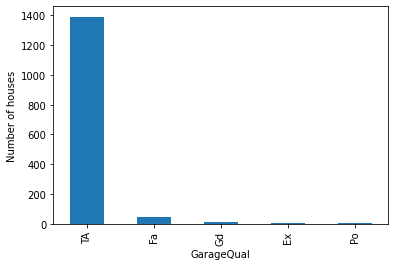

In [37]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("GarageQual")
plt.ylabel("Number of houses")

In [38]:
df['GarageQual'].fillna("Missing", inplace=True)

Text(0, 0.5, 'Nmuber of houses')

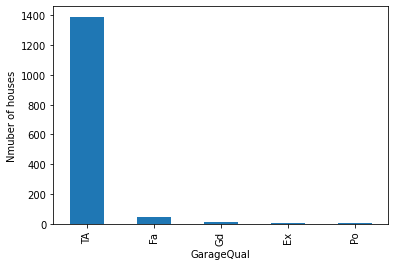

In [39]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Nmuber of houses')

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['SalePrice']), df['SalePrice'], test_size=0.2)

In [43]:
imputer = SimpleImputer(strategy='constant', fill_value='Missing')

In [44]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

c:\Users\uqba2\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [45]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)

## frequent value Imputation

<AxesSubplot:>

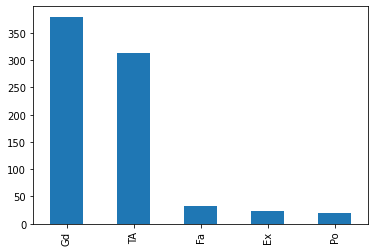

In [36]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [46]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

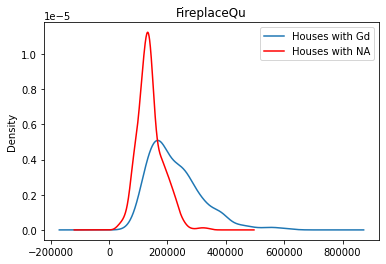

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels =['Houses with Gd', 'Houses with NA']
ax.legend(lines,labels, loc='best')

plt.title("FireplaceQu")

In [49]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [50]:
df['FireplaceQu'].fillna('Gd', inplace=True)

<AxesSubplot:>

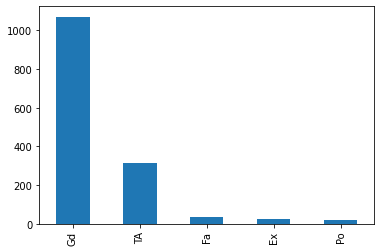

In [53]:
df['FireplaceQu'].value_counts().plot(kind = 'bar')

Text(0.5, 1.0, 'FireplaceQu')

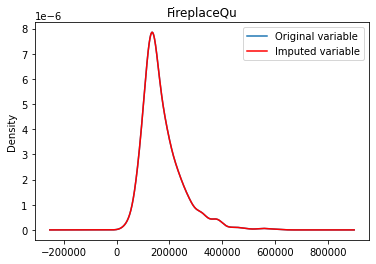

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [60]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [61]:
imputer = SimpleImputer(strategy='most_frequent')


In [62]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

c:\Users\uqba2\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [63]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)